# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("01_source/tabula_ch/tabula_bienen.csv")

In [4]:
df.head()

,ORDER,FAMILY,Artname,N,S,CH,Bemerkungen
0,HYMENQPTERA (HAUTFLÜGLER),apoidea (Bienen),Colletes carinatus gallicus RAD.,-,0,0.0,NaN
1,HYMENQPTERA (HAUTFLÜGLER),apoidea (Bienen),C. collaris DOURS.,0,-,0.0,NaN
2,HYMENQPTERA (HAUTFLÜGLER),apoidea (Bienen),C. cunicularius (L.),2,2,2.0,"Sandbewohner, auf Salix"
3,HYMENQPTERA (HAUTFLÜGLER),apoidea (Bienen),C. dimidiatus GIST.,-,3,3.0,NaN
4,HYMENQPTERA (HAUTFLÜGLER),apoidea (Bienen),C. floralis EV.,-,4,4.0,NaN


In [5]:
len (df)

301

In [6]:
df.shape

(301, 7)

In [7]:
df["CH"].value_counts()

3.0    125
0.0     67
2.0     42
4.0     37
1.0     25
Name: CH, dtype: int64

In [8]:
df.pop("N")

0        -
1        0
2        2
3        -
4        -
5        0
6        -
7        -
8        -
9        2
10       -
11       0
12       4
13       4
14       3
15       -
16       3
17       0
18       -
19       4
20       -
21       3
22       2
23       3
24       3
25       3
26       0
27     NaN
28       -
29       2
      ... 
271      0
272      0
273      0
274      -
275      0
276      -
277      -
278      -
279      -
280      0
281      -
282      -
283    NaN
284    NaN
285    NaN
286    NaN
287    NaN
288    NaN
289    NaN
290      -
291      0
292      0
293      3
294      2
295      4
296      2
297      2
298      2
299      3
300      3
Name: N, Length: 301, dtype: object

In [9]:
df.pop("S")

0        0
1        -
2        2
3        3
4        4
5        3
6        0
7        3
8        4
9        3
10       2
11       0
12       4
13       -
14       n
15       4
16       n
17       -
18       0
19       4
20       4
21       3
22       2
23       3
24       n
25       -
26       3
27     NaN
28       1
29       2
      ... 
271      n
272      3
273      1
274      1
275      3
276      2
277      0
278      3
279      1
280      0
281      3
282      0
283    NaN
284    NaN
285    NaN
286    NaN
287    NaN
288    NaN
289    NaN
290      3
291      0
292      -
293      n
294      n
295      4
296      -
297      -
298      2
299      n
300      -
Name: S, Length: 301, dtype: object

In [10]:
df.rename(columns={"ORDER": "order", "FAMILY":"family", "Artname": "sc name","CH":"cat ch", "Bemerkungen": "bemerkungen"},inplace=True)

In [11]:
df.head(1)

,order,family,sc name,cat ch,bemerkungen
0,HYMENQPTERA (HAUTFLÜGLER),apoidea (Bienen),Colletes carinatus gallicus RAD.,0.0,NaN


In [12]:
df['einteilung'] = 'Insekten'
df['untergruppe'] = 'Bienen'

In [13]:
df.head(1)

,order,family,sc name,cat ch,bemerkungen,einteilung,untergruppe
0,HYMENQPTERA (HAUTFLÜGLER),apoidea (Bienen),Colletes carinatus gallicus RAD.,0.0,NaN,Insekten,Bienen


In [14]:
df["cat ch"].value_counts()

3.0    125
0.0     67
2.0     42
4.0     37
1.0     25
Name: cat ch, dtype: int64

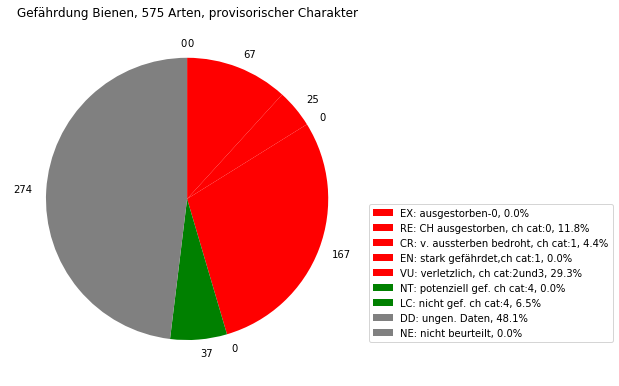

In [16]:
values = [0, 67, 25, 0, 167, 0, 37, 274, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben-0', 'RE: CH ausgestorben, ch cat:0',
    'CR: v. aussterben bedroht, ch cat:1', 'EN: stark gefährdet,ch cat:1', 
    'VU: verletzlich, ch cat:2und3',"NT: potenziell gef. ch cat:4",
    "LC: nicht gef. ch cat:4","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Bienen, 575 Arten, provisorischer Charakter')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()